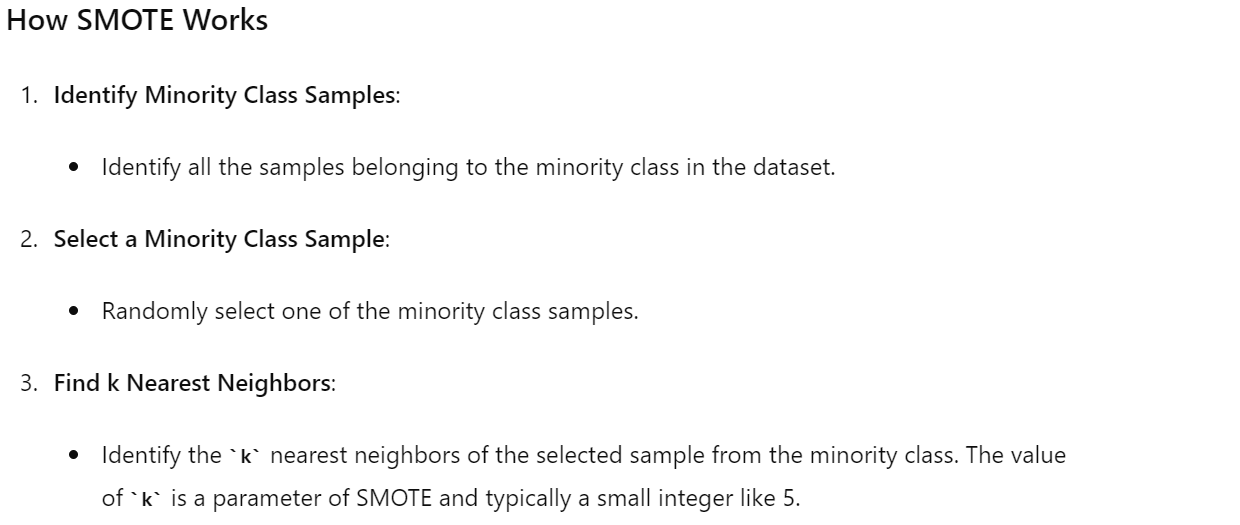
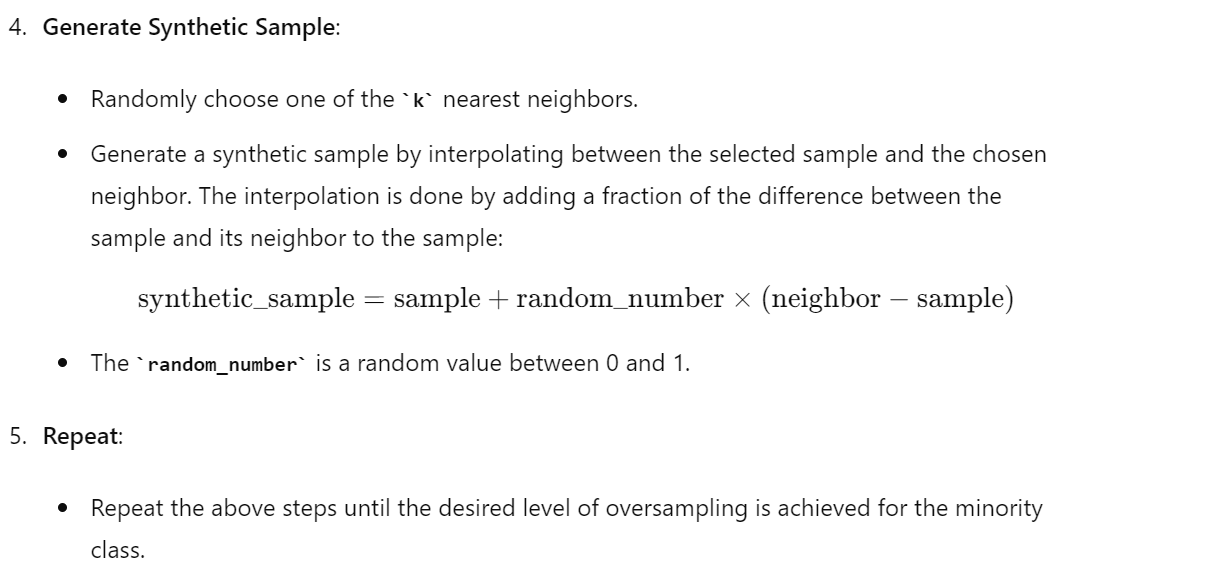

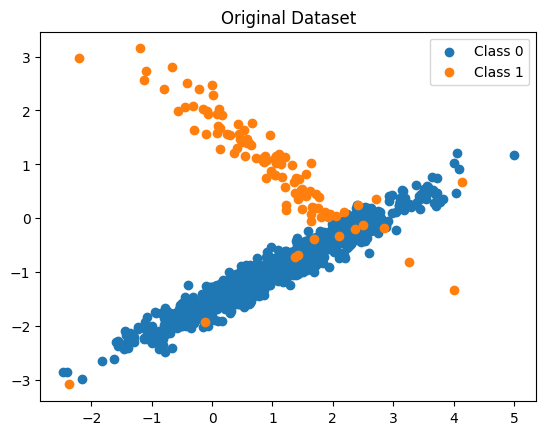

The n size is 210


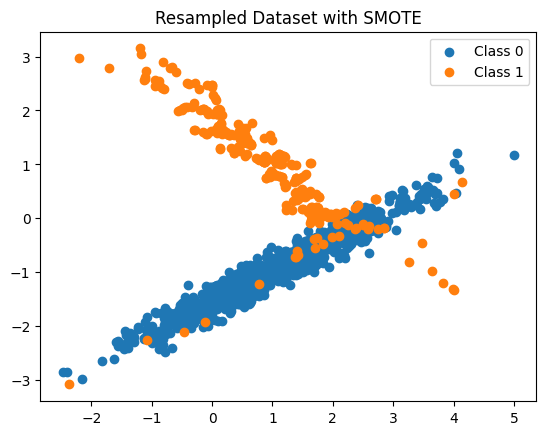

In [6]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def smote(X, y, minority_class, N=100, k=5):
    """
    Perform SMOTE (Synthetic Minority Over-sampling Technique).

    Parameters:
    X (numpy.ndarray): Feature matrix.
    y (numpy.ndarray): Target array.
    minority_class (int): Label of the minority class.
    N (int): Number of synthetic samples to create (percentage of the minority class).
    k (int): Number of nearest neighbors to use.

    Returns:
    X_res (numpy.ndarray): Resampled feature matrix.
    y_res (numpy.ndarray): Resampled target array.
    """
    # Extract minority class samples
    X_minority = X[y == minority_class]
    
    # Number of synthetic samples to create
    n_minority_samples, n_features = X_minority.shape
    n_synthetic_samples = (N // 100) * n_minority_samples
    print(f'The n size is {n_synthetic_samples}')
    
    # Fit nearest neighbors
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X_minority)
    
    synthetic_samples = []
    
    for i in range(n_minority_samples):
        # Find k nearest neighbors
        nn_array = neigh.kneighbors([X_minority[i]], return_distance=False)[0]
        
        for _ in range(N // 100):
            # Choose a random neighbor
            nn_index = np.random.choice(nn_array[1:])  # Exclude the sample itself
            diff = X_minority[nn_index] - X_minority[i]
            gap = np.random.rand()
            synthetic_sample = X_minority[i] + gap * diff
            synthetic_samples.append(synthetic_sample)
    
    # Convert synthetic samples to numpy array
    synthetic_samples = np.array(synthetic_samples)
    
    # Create resampled dataset
    X_res = np.vstack((X, synthetic_samples))
    y_res = np.hstack((y, [minority_class] * n_synthetic_samples))
    
    return X_res, y_res

# Example usage
if __name__ == "__main__":
    from sklearn.datasets import make_classification
    import matplotlib.pyplot as plt

    # Create an imbalanced dataset
    X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                               n_clusters_per_class=1, weights=[0.9, 0.1], random_state=42)
    
    # Plot original dataset
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
    plt.title('Original Dataset')
    plt.legend()
    plt.show()

    # Apply SMOTE
    X_res, y_res = smote(X, y, minority_class=1, N=200, k=5)
    
    # Plot resampled dataset
    plt.scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label='Class 0')
    plt.scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label='Class 1')
    plt.title('Resampled Dataset with SMOTE')
    plt.legend()
    plt.show()


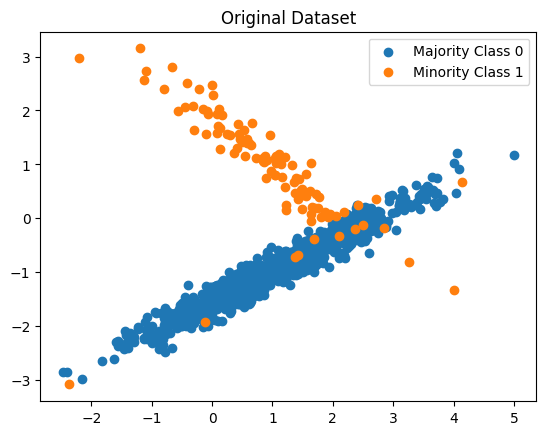

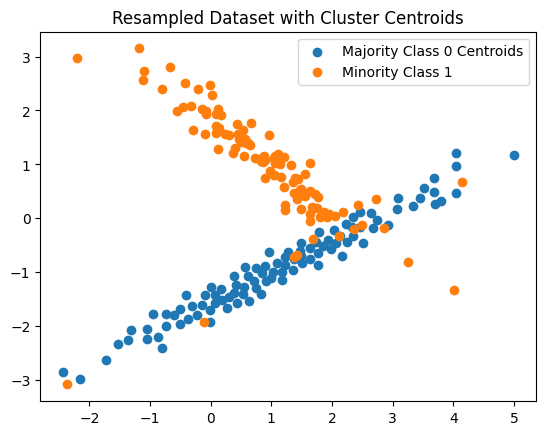

In [7]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def cluster_centroids(X, y, majority_class, n_clusters):
    """
    Perform clustering to determine representative centroids for the majority class.

    Parameters:
    X (numpy.ndarray): Feature matrix.
    y (numpy.ndarray): Target array.
    majority_class (int): Label of the majority class.
    n_clusters (int): Number of clusters.

    Returns:
    X_res (numpy.ndarray): Resampled feature matrix.
    y_res (numpy.ndarray): Resampled target array.
    """
    # Extract majority class samples
    X_majority = X[y == majority_class]
    y_majority = y[y == majority_class]
    
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_majority)
    centroids = kmeans.cluster_centers_
    
    # Combine centroids with minority class samples
    X_minority = X[y != majority_class]
    y_minority = y[y != majority_class]
    
    X_res = np.vstack((X_minority, centroids))
    y_res = np.hstack((y_minority, [majority_class] * n_clusters))
    
    return X_res, y_res

# Example usage
if __name__ == "__main__":
    # Create an imbalanced dataset
    X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                               n_clusters_per_class=1, weights=[0.9, 0.1], random_state=42)
    
    # Plot original dataset
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Majority Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Minority Class 1')
    plt.title('Original Dataset')
    plt.legend()
    plt.show()

    # Apply Cluster Centroids
    X_res, y_res = cluster_centroids(X, y, majority_class=0, n_clusters=100)
    
    # Plot resampled dataset
    plt.scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label='Majority Class 0 Centroids')
    plt.scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label='Minority Class 1')
    plt.title('Resampled Dataset with Cluster Centroids')
    plt.legend()
    plt.show()


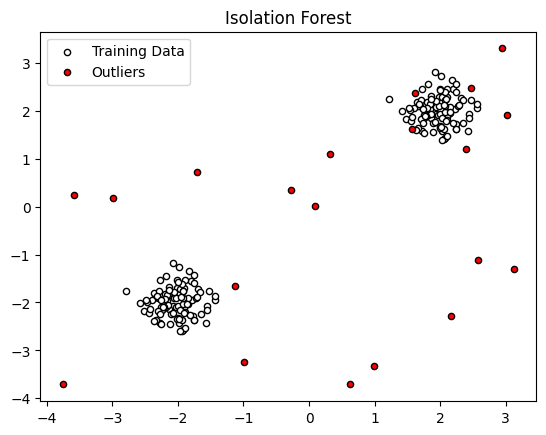

Predictions for training data: [ 1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1]
Predictions for outliers: [-1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate synthetic data
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# Combine training data and outliers
X = np.r_[X_train, X_outliers]

# Fit the Isolation Forest model
clf = IsolationForest(contamination=0.1, random_state=rng)
clf.fit(X_train)

# Predict anomalies
y_pred_train = clf.predict(X_train)
y_pred_outliers = clf.predict(X_outliers)

# Visualization
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k', label="Training Data")
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k', label="Outliers")
plt.legend()
plt.title("Isolation Forest")
plt.show()

# Print the results
print("Predictions for training data:", y_pred_train)
print("Predictions for outliers:", y_pred_outliers)


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

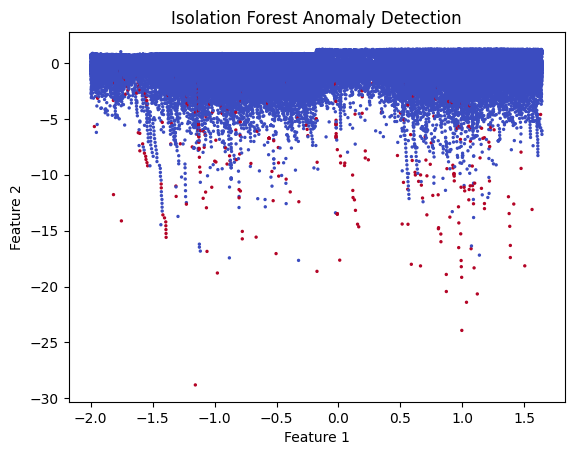

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Print the first few rows of the dataset
print(data.head())

# Separate the features and the target
X = data.drop(columns=['Class'])
y = data['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Isolation Forest model
clf = IsolationForest(contamination=0.001, random_state=42)
clf.fit(X_scaled)

# Predict anomalies
y_pred = clf.predict(X_scaled)
y_pred = np.where(y_pred == 1, 0, 1)  # Convert predictions: 1 -> 0 (normal), -1 -> 1 (anomaly)

# Evaluate the results
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred))

# Visualize a subset of the data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='coolwarm', s=2)
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [21]:
import pandas as pd

# Sample data
data = {
    'customer_id': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                    2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    'name': ['a','a', 'a', 'a', 'a','a','a', 'a', 'a', 'a','a','a', 'a', 'a', 'a','a','a', 'a', 'a', 'a'],
    'trans_amount': [100, 200, 50, 300, 400, 150, 250, 350, 450, 500,
                     600, 700, 800, 500, 400, 300, 200, 100, 900, 1000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to get the 7th largest trans_amount
def get_7th_largest(group):
    if len(group) >= 7:
        return group.nlargest(7).iloc[-1]
    else:
        return None

# Apply the function to each customer group
result = df.groupby('customer_id')['trans_amount'].apply(get_7th_largest).reset_index()

# Rename the columns for better understanding
result.columns = ['customer_id', '7th_largest_trans_amount']


print(result)


   customer_id  7th_largest_trans_amount
0            1                       200
1            2                       400


In [23]:
import pandas as pd

# Sample data
data = {
    'customer_id': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
                    2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    'name': ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 
             'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'],
    'trans_amount': [100, 200, 50, 300, 400, 150, 250, 350, 450, 500,
                     600, 700, 800, 500, 400, 300, 200, 100, 900, 1000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to get the 7th largest trans_amount row
def get_7th_largest(group):
    if len(group) >= 7:
        return group.nlargest(7, 'trans_amount').iloc[-1]
    else:
        return None

# Apply the function to each customer group
result = df.groupby('customer_id').apply(get_7th_largest).reset_index(drop=True)

print(result)


   customer_id name  trans_amount
0            1    a           200
1            2    b           400


C:\Users\diptiwar\AppData\Local\Temp\ipykernel_3376\1958363294.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('customer_id').apply(get_7th_largest).reset_index(drop=True)


In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Generate synthetic data
np.random.seed(42)
normal_data = np.random.normal(0, 1, (1000, 20))
anomalous_data = np.random.normal(5, 1, (50, 20))
X = np.vstack([normal_data, anomalous_data])
y = np.hstack([np.zeros(1000), np.ones(50)])

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build the autoencoder model
input_dim = X_scaled.shape[1]
encoding_dim = 14  # Dimension of the latent space

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2, verbose=0)

# Predict reconstruction errors
X_reconstructed = autoencoder.predict(X_scaled)
reconstruction_error = np.mean(np.square(X_scaled - X_reconstructed), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 95)
y_pred = (reconstruction_error > threshold).astype(int)

# Evaluate the results
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred))


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
[[997   3]
 [  0  50]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1000
         1.0       0.94      1.00      0.97        50

    accuracy                           1.00      1050
   macro avg       0.97      1.00      0.98      1050
weighted avg       1.00      1.00      1.00      1050

